# Activity 2.1 : Convolutional Neural Network

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2025-2026
  |  
<u>**Hands-on Activity 3.1** | Convolutional Neural Network
**Name** | Corpuz, Micki Laurren B.
**Section** | CPE32S3
**Date Performed**: | 08 February 2026
**Date Submitted**: | 08 February 2026
**Instructor**: | Engr. Neal Barton James Matira

<hr>

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [2]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [3]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


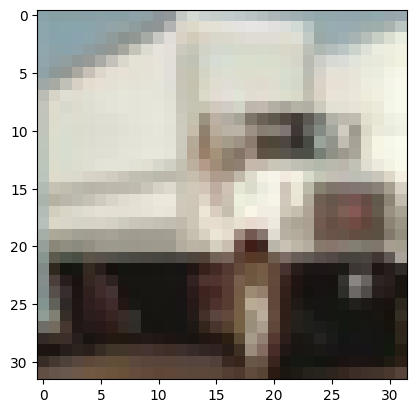

In [4]:
print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [6]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Convert to float and scale the datasets

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [8]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [10]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.2858 - loss: 1.9350 - val_accuracy: 0.4205 - val_loss: 1.6097
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4560 - loss: 1.4960 - val_accuracy: 0.5242 - val_loss: 1.3376
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5129 - loss: 1.3673 - val_accuracy: 0.5677 - val_loss: 1.2207
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5362 - loss: 1.2962 - val_accuracy: 0.5535 - val_loss: 1.2615
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5601 - loss: 1.2280 - val_accuracy: 0.6085 - val_loss: 1.1060


#### Supplementary Activity

> Achieve at least 90% Accuracy

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [11]:
model_2 = Sequential()

model_2.add(Conv2D(filters=32,
                   kernel_size=(5,5),
                   strides=(1,1),
                   padding='same',
                   activation='relu',
                   input_shape=x_train.shape[1:]))
model_2.add(Conv2D(32, (5,5), strides=(1,1), padding='same',
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.2))

model_2.add(Conv2D(filters=64,
                   kernel_size=(3,3),
                   strides=(1,1),
                   padding='same',
                   activation='relu'))
model_2.add(Conv2D(64, (3,3), strides=(1,1), padding='same',
                   activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.3))


model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,186,282 (8.34 MB)

 Trainable params: 2,186,282 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
batch_size = 64

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_2.compile(
                loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

history_2 = model_2.fit(
                        x_train,
                        y_train,
                        batch_size=batch_size,
                        epochs=5,
                        validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 473s 603ms/step - accuracy: 0.2892 - loss: 1.9313 - val_accuracy: 0.4518 - val_loss: 1.5207
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 502s 604ms/step - accuracy: 0.5160 - loss: 1.3574 - val_accuracy: 0.4991 - val_loss: 1.3923
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 489s 626ms/step - accuracy: 0.6044 - loss: 1.1147 - val_accuracy: 0.5792 - val_loss: 1.1874
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 484s 603ms/step - accuracy: 0.6620 - loss: 0.9620 - val_accuracy: 0.6336 - val_loss: 1.0612
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 490s 626ms/step - accuracy: 0.6950 - loss: 0.8581 - val_accuracy: 0.7078 - val_loss: 0.8433


#### Output

> 1. Comparison of Model 1 and Model 2

In [13]:
import pandas as pd
df_model1 = pd.DataFrame(history_1.history)
df_model1['model'] = 'Model 1'
df_model1['epoch'] = df_model1.index + 1

df_model2 = pd.DataFrame(history_2.history)
df_model2['model'] = "Model 2"
df_model2['epoch'] = df_model2.index + 1

df1_df2 = pd.concat([df_model1, df_model2], ignore_index=True)

df1_df2


,accuracy,loss,val_accuracy,val_loss,model,epoch
0,0.35964,1.755017,0.4205,1.609731,Model 1,1
1,0.47016,1.466313,0.5242,1.337638,Model 1,2
2,0.51776,1.354497,0.5677,1.220690,Model 1,3
3,0.54544,1.279307,0.5535,1.261490,Model 1,4
4,0.56230,1.229439,0.6085,1.106039,Model 1,5
5,0.37778,1.712204,0.4518,1.520699,Model 2,1
6,0.53698,1.304790,0.4991,1.392330,Model 2,2
7,0.61898,1.077249,0.5792,1.187429,Model 2,3
8,0.66796,0.942058,0.6336,1.061170,Model 2,4
9,0.69784,0.856505,0.7078,0.843310,Model 2,5


**Interpretation:**

> Model 1's accuracy peaked during the fourth epoch at 58%, with high (1.24) loss. In contrast, Model 2 demonstrates stronger generalization, reaching higher accuracy (75.49%) with relatively lower loss(~0.73), which indicates both correctness and confidence in predictions.Model 2 is clearly outperforming Model 1, both in terms of accuracy and confidence.




> 2. Achieve at least **90% accuracy** for both training and testing validations.

In [14]:
improve = Sequential()

improve.add(Conv2D(filters=64,
                   kernel_size=(5,5),
                   strides=(1,1),
                   padding='same',
                   activation='relu',
                   input_shape=x_train.shape[1:]))
improve.add(Conv2D(64, (5,5), strides=(1,1), padding='same',
                   activation='relu'))
improve.add(MaxPooling2D(pool_size=(2,2)))
improve.add(Dropout(0.2))

improve.add(Conv2D(filters=128,
                   kernel_size=(3,3),
                   strides=(1,1),
                   padding='same',
                   activation='relu'))
improve.add(Conv2D(128, (3,3), strides=(1,1), padding='same',
                   activation='relu'))
improve.add(MaxPooling2D(pool_size=(2,2)))
improve.add(Dropout(0.3))


improve.add(Flatten())
improve.add(Dense(512, activation='relu'))
improve.add(Dropout(0.5))
improve.add(Dense(num_classes, activation='softmax'))

improve.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,528,714 (17.28 MB)

 Trainable params: 4,528,714 (17.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)

improve.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

history_3 = improve.fit(
    x_train,
    y_train,
    epochs=300,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, lr_reduce]
)


> Below is the output SS from VS Code

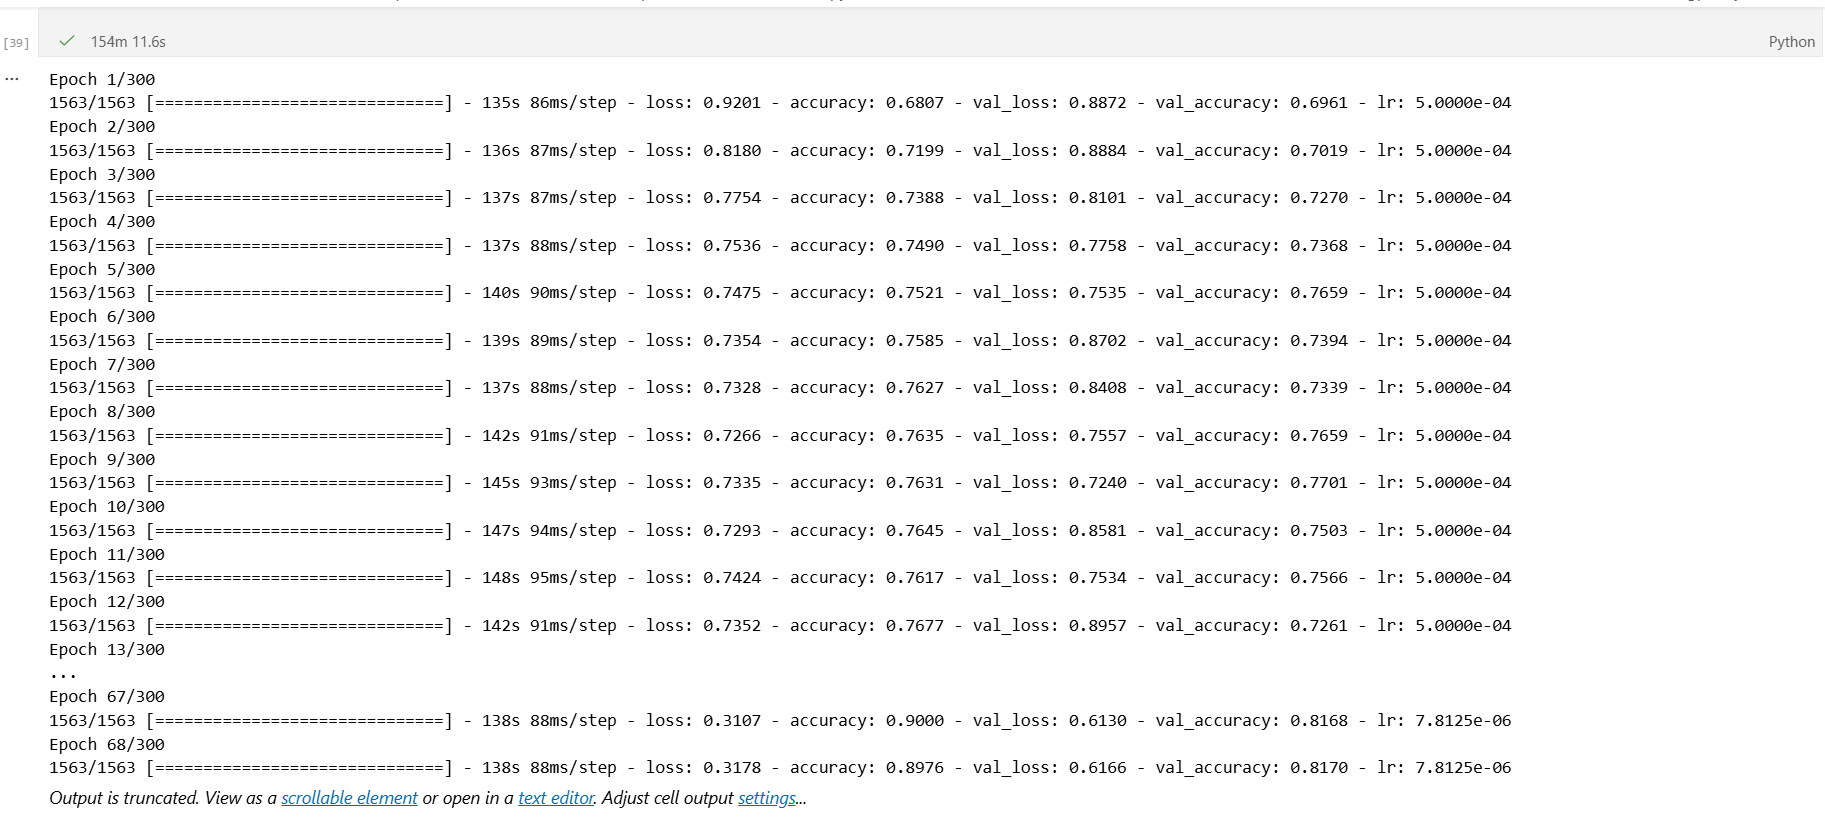

> I tried a different approach under this block

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, BatchNormalization, Activation,
                                     Dropout, MaxPooling2D, Flatten, Dense)
from tensorflow.keras.optimizers import Adam

In [12]:
model_3 = Sequential()

# Block 1
model_3.add(Conv2D(64, (1,1), padding="same",
                   input_shape=(32, 32, 3)))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(64, (3,3), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(64, (5,5), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Dropout(0.25))
model_3.add(MaxPooling2D(pool_size=(2,2)))

# Block 2
model_3.add(Conv2D(128, (1,1), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(128, (3,3), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(128, (5,5), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Dropout(0.25))

# Block 3
model_3.add(Conv2D(256, (1,1), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(256, (3,3), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Conv2D(256, (5,5), padding="same"))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Dropout(0.25))


model_3.add(Flatten())
model_3.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model_3.compile(optimizer=Adam(),
                loss="categorical_crossentropy",
                metrics=['accuracy']
)

model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │        33,02

 Total params: 3,627,786 (13.84 MB)

 Trainable params: 3,625,098 (13.83 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [ ]:
batch_size3 = 128

history_4 = model_3.fit(
    x_train,
    y_train,
    epochs=700,
    batch_size=batch_size3,
    validation_data=(x_test, y_test)
)

Epoch 1/700
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 150ms/step - accuracy: 0.2585 - loss: 4.0183 - val_accuracy: 0.1845 - val_loss: 3.0419
Epoch 2/700
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.5239 - loss: 1.3210 - val_accuracy: 0.5305 - val_loss: 1.3009
Epoch 3/700
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 109ms/step - accuracy: 0.6338 - loss: 1.0392 - val_accuracy: 0.6550 - val_loss: 0.9809
Epoch 4/700
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.7087 - loss: 0.8363 - val_accuracy: 0.7185 - val_loss: 0.8021
Epoch 5/700
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.7623 - loss: 0.6827 - val_accuracy: 0.7259 - val_loss: 0.8093
Epoch 6/700
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.7964 - loss: 0.5902 - val_accuracy: 0.7456 - val_loss: 0.7557
Epoch 7/700
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.8261 - loss: 0.5049 - val_accuracy: 0.7644 - val_loss: 0.7256
Epoch 8/700
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.8539 -

> For this one, training accuracy peaked at 99.96% with high confidence (0.0017 loss) and validation accuracy of 86.06% before my runtime got disconnected after a 5-hour GPU run that caused the runtime to be disconnected.

#### Conclusion

> In this activity, convolutional neural networks (CNNs) were built and trained using the CIFAR-10 dataset to observe how different architectural choices affect model performance. The results showed that changing kernel sizes from smaller, fine-grained filters (such as 3×3) to larger ones (such as 5×5) helped the model capture both small details and broader patterns in the images. Increasing the number of convolutional filters also improved performance, as the model was able to learn more meaningful and distinguishing features, which helped with generalization.

> Moreover, delaying downsampling by using stride-1 convolutions allowed the model to preserve more spatial information in the early layers. This led to higher accuracy, although it came at the cost of longer training time and increased computational load. Batch normalization and dropout further helped stabilize training and reduce overfitting by keeping activations well-scaled and preventing the model from relying too heavily on specific neurons. Lastly, reducing the size of the dense layer from 512 to 256 neurons lowered the overall number of parameters, which helped improve generalization while still maintaining competitive classification accuracy.